In [2]:
# 기본라이브러리 import
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##100만개 데이터셋 분석  
331,059(33.11%) : 정상적인 네트워크 트래픽  
668,941(66.89%) : 악성 네트워크 트래픽

In [39]:
df100 = pd.read_csv("/content/drive/MyDrive/데청캠/NF-UQ-NIDS-v2_0_100M.csv", nrows=1000000)
df100.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,...,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,...,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2


In [40]:
#Benign 포함 Attack 유형별 개수
count = df100['Attack'].value_counts()

count

Benign            331059
DDoS              285935
DoS               235662
scanning           50360
Reconnaissance     34187
xss                32341
password           14996
injection           9006
Bot                 1884
Brute Force         1614
Infilteration       1568
Exploits             410
Fuzzers              294
Backdoor             241
Generic              220
mitm                  99
ransomware            43
Analysis              36
Theft                 23
Shellcode             18
Worms                  4
Name: Attack, dtype: int64

In [41]:
#Benign 미포함 Attack 유형별 개수
filtered_df100 = df100[df100['Attack'] != 'Benign']
count = filtered_df100['Attack'].value_counts()

count

DDoS              285935
DoS               235662
scanning           50360
Reconnaissance     34187
xss                32341
password           14996
injection           9006
Bot                 1884
Brute Force         1614
Infilteration       1568
Exploits             410
Fuzzers              294
Backdoor             241
Generic              220
mitm                  99
ransomware            43
Analysis              36
Theft                 23
Shellcode             18
Worms                  4
Name: Attack, dtype: int64

In [42]:
#공격들 개수 합
sum = filtered_df100['Attack'].value_counts().sum()
sum

668941

In [43]:
#공격별 비율
ratio = count / sum

print(ratio * 100)

DDoS              42.744427
DoS               35.229116
scanning           7.528317
Reconnaissance     5.110615
xss                4.834657
password           2.241752
injection          1.346307
Bot                0.281639
Brute Force        0.241277
Infilteration      0.234400
Exploits           0.061291
Fuzzers            0.043950
Backdoor           0.036027
Generic            0.032888
mitm               0.014800
ransomware         0.006428
Analysis           0.005382
Theft              0.003438
Shellcode          0.002691
Worms              0.000598
Name: Attack, dtype: float64


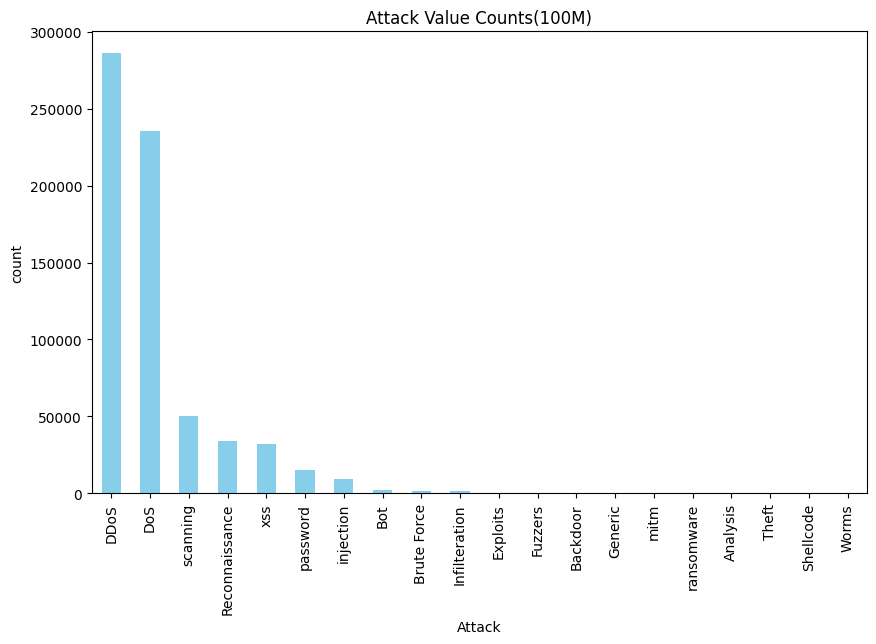

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # 그래프 크기 설정
count.plot(kind='bar', color='skyblue')  # 막대그래프 그리기
plt.title('Attack Value Counts(100M)')  # 그래프 제목 설정
plt.xlabel('Attack')  # x축 레이블 설정
plt.ylabel('count')  # y축 레이블 설정
plt.show()  # 그래프를 화면에 출력

In [53]:
benign = 331059 / 1000000 * 100
attack = 668941 / 1000000 * 100

print("Benign : ", benign)
print("Attack : ", attack)

Benign :  33.1059
Attack :  66.8941


## 300만개 데이터셋 분석

In [46]:
df = pd.read_csv("/content/drive/MyDrive/데청캠/NF-UQ-NIDS-v2_0_300M.csv", nrows=3000000)
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,...,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,...,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2


In [47]:
#Benign 포함 Attack 유형별 개수
count = df['Attack'].value_counts()

count

Benign            992765
DDoS              858901
DoS               706006
scanning          149713
Reconnaissance    103705
xss                96960
password           45313
injection          27060
Bot                 5695
Brute Force         4979
Infilteration       4718
Exploits            1239
Fuzzers              878
Backdoor             737
Generic              677
mitm                 292
ransomware           125
Analysis              93
Theft                 86
Shellcode             52
Worms                  6
Name: Attack, dtype: int64

In [48]:
#Benign 미포함 Attack 유형별 개수
filtered_df = df[df['Attack'] != 'Benign']
count = filtered_df['Attack'].value_counts()

count

DDoS              858901
DoS               706006
scanning          149713
Reconnaissance    103705
xss                96960
password           45313
injection          27060
Bot                 5695
Brute Force         4979
Infilteration       4718
Exploits            1239
Fuzzers              878
Backdoor             737
Generic              677
mitm                 292
ransomware           125
Analysis              93
Theft                 86
Shellcode             52
Worms                  6
Name: Attack, dtype: int64

In [49]:
#공격들 개수 합
sum = filtered_df['Attack'].value_counts().sum()
sum

2007235

In [50]:
#공격별 비율
ratio = count / sum

print(ratio * 100)

DDoS              42.790256
DoS               35.173061
scanning           7.458668
Reconnaissance     5.166560
xss                4.830526
password           2.257484
injection          1.348123
Bot                0.283724
Brute Force        0.248053
Infilteration      0.235050
Exploits           0.061727
Fuzzers            0.043742
Backdoor           0.036717
Generic            0.033728
mitm               0.014547
ransomware         0.006227
Analysis           0.004633
Theft              0.004285
Shellcode          0.002591
Worms              0.000299
Name: Attack, dtype: float64


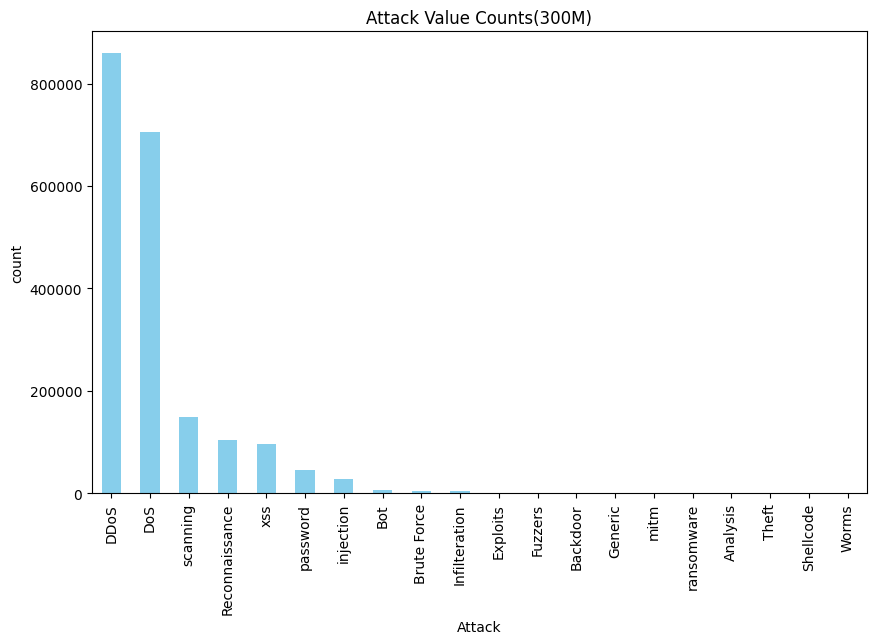

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # 그래프 크기 설정
count.plot(kind='bar', color='skyblue')  # 막대그래프 그리기
plt.title('Attack Value Counts(300M)')  # 그래프 제목 설정
plt.xlabel('Attack')  # x축 레이블 설정
plt.ylabel('count')  # y축 레이블 설정
plt.show()  # 그래프를 화면에 출력

In [52]:
benign = 992765 / 3000000 * 100
attack = 2007235 / 3000000 * 100

print("Benign : ", benign)
print("Attack : ", attack)

Benign :  33.092166666666664
Attack :  66.90783333333333
